In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Reshape, Activation
from tensorflow.keras.losses import MeanSquaredError


In [67]:
!unzip //content/drive/MyDrive/MNIST_GENAI.zip

Archive:  //content/drive/MyDrive/MNIST_GENAI.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [78]:
mnist_train_data=pd.read_csv('/content/mnist_train.csv')
mnist_test_data=pd.read_csv('/content/mnist_test.csv')

In [79]:
mnist_train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
def dropper(df):
  df = df.iloc[:, 1:].values
  return df

In [80]:
train=dropper(mnist_train_data).reshape(-1, 28, 28).astype('float32') / 255.0
test=dropper(mnist_test_data).reshape(-1, 28, 28).astype('float32') / 255.0

In [94]:
print(train.shape)

(60000, 28, 28)


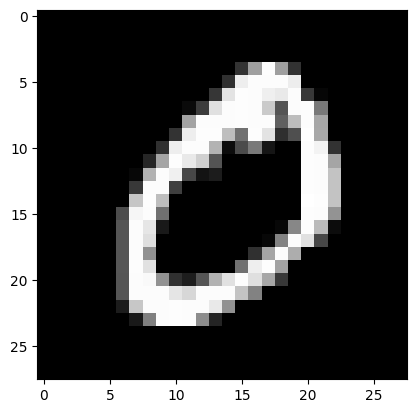

In [82]:
# Plot image data from x_train
plt.imshow(train[1], cmap = "gray")
plt.show()

In [101]:
def VAE(latent_dim):

  # Define the encoder model
  encoder = Sequential([
      Flatten(input_shape=(28, 28)),
      Dense(196, activation='relu'),
      Dropout(0.5),
      Dense(49, activation='relu'),
      Dropout(0.5),
      # Dense(128, activation='relu'),
      # Dropout(0.5),
      # Dense(64, activation='relu'),
      # Dropout(0.5),
      Dense(latent_dim, activation='relu')
  ])

  # Define the decoder model
  decoder = Sequential([
      Dense(49, input_shape=(latent_dim,), activation='relu'),
      Dropout(0.5),
      Dense(196, activation='relu'),
      # Dropout(0.5),
      # Dense(256, activation='relu'),
      # Dropout(0.5),
      # Dense(512, activation='relu'),
      # Dropout(0.5),
      Dense(784),
      Activation("sigmoid"),
      Reshape((28, 28))
  ])

  # Define input and output layers for the VAE model
  img = Input(shape=(28, 28))
  latent_vector = encoder(img)
  output = decoder(latent_vector)

  # Create the VAE model
  model = Model(inputs=img, outputs=output)

  # Compile the model
  model.compile(optimizer='adam', loss=MeanSquaredError())

  # Define number of epochs
  EPOCHS = 10

  # Iterate through epochs
  for epoch in range(EPOCHS):

      rand = train[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))

      # # Display reconstructed images for 4x4 grid
      # if epoch%5==0:
      #   fig, axs = plt.subplots(4, 4)
      #   for i in range(4):
      #       for j in range(4):
      #           axs[i, j].imshow(model.predict(rand[i, j],verbose=0)[0], cmap="gray")
      #           axs[i, j].axis("off")

      #   plt.subplots_adjust(wspace=0, hspace=0)
      #   plt.show()
      print(f"EPOCH: {epoch}")
      model.fit(train, train, verbose=0)

  # Display the first 5 samples of test dataset along with reconstructed images and calculate MSE
  mse_sum = 0
  for i in range(5):
      sample_image = test[i]
      reconstructed_image = model.predict(sample_image.reshape(1, 28, 28),verbose=0)[0]
      mse = tf.keras.losses.mean_squared_error(sample_image, reconstructed_image)
      mse_sum += mse
      plt.figure()
      plt.subplot(1, 2, 1)
      plt.imshow(sample_image, cmap="gray")
      plt.title("Original")
      plt.subplot(1, 2, 2)
      plt.imshow(reconstructed_image, cmap="gray")
      plt.title("Reconstructed")
      plt.show()

  # # Calculate the MSE over the entire test dataset
  # mse_sum = 0
  # for i in range(len(test)):
  #     sample_image = test[i]
  #     print(f"test sample:{i}")
  #     reconstructed_image = model.predict(sample_image.reshape(1, 28, 28),verbose=0)[0]
  #     mse = tf.keras.losses.mean_squared_error(sample_image, reconstructed_image).numpy()
  #     mse_sum += mse

  # # Calculate the average MSE
  # mse_total = mse_sum / len(test)
  # print("Mean Squared Error (MSE) over the entire test set:", mse_total)
  reconstructed_images = model.predict(test)

  # Calculate the Mean Squared Error (MSE) between original and reconstructed images
  mse = tf.keras.losses.mean_squared_error(test, reconstructed_images)

  # Compute the average MSE over the entire test dataset
  average_mse = tf.reduce_mean(mse)
  print("Mean Squared Error (MSE) over the entire test set:", average_mse.numpy())
  return average_mse

In [102]:
ldims=[2,4,8,16,32,64]
mse=[]

EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9


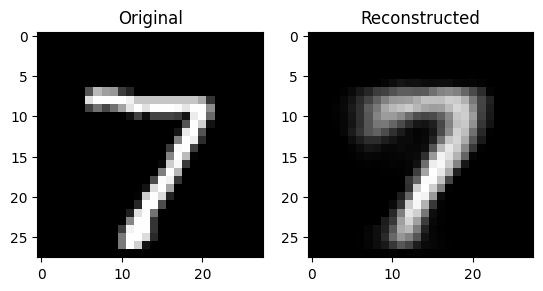

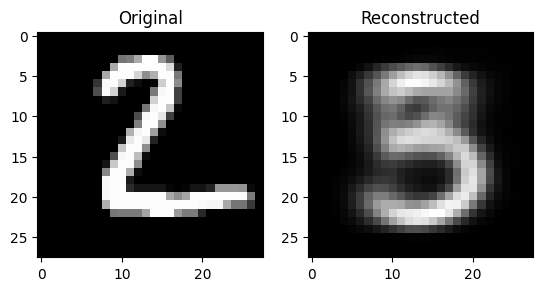

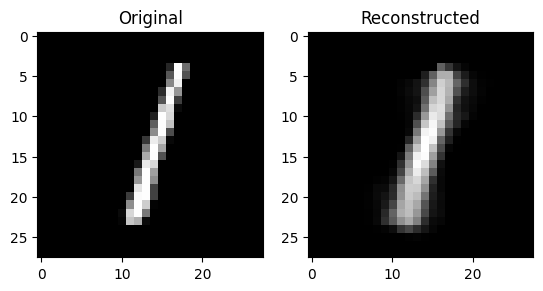

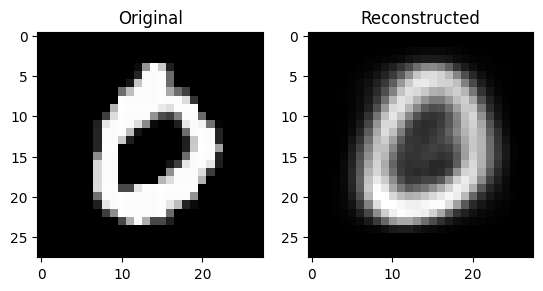

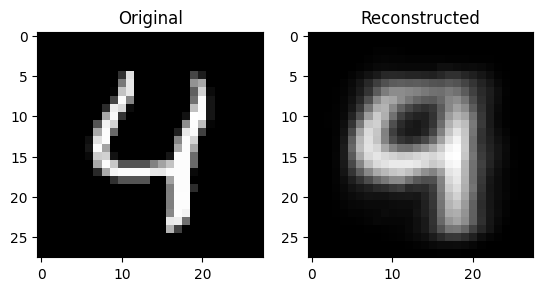

313/313 [==============================] - 0s 1ms/step
Mean Squared Error (MSE) over the entire test set: 0.0443215


In [103]:
mse.append(VAE(2))

EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9


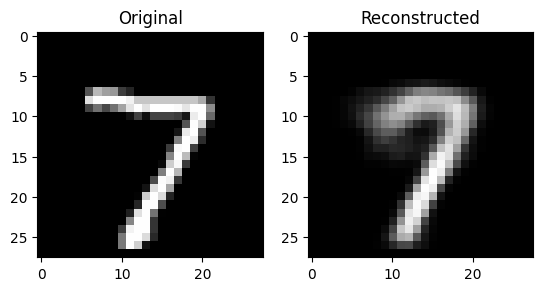

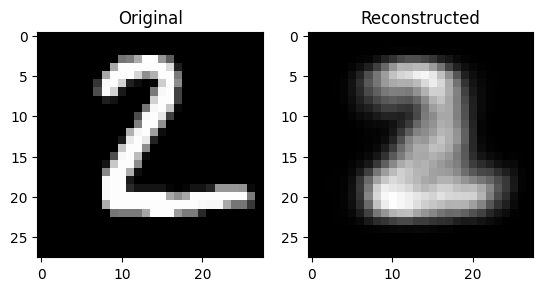

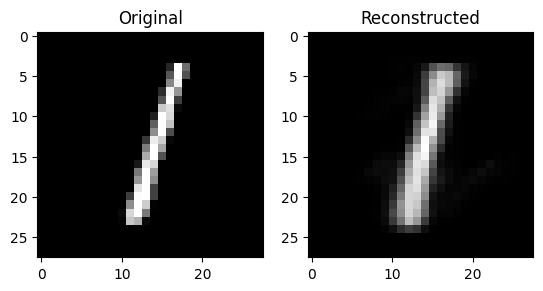

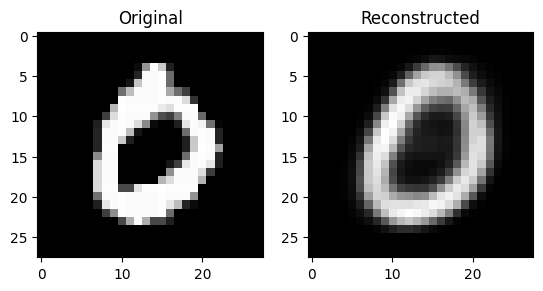

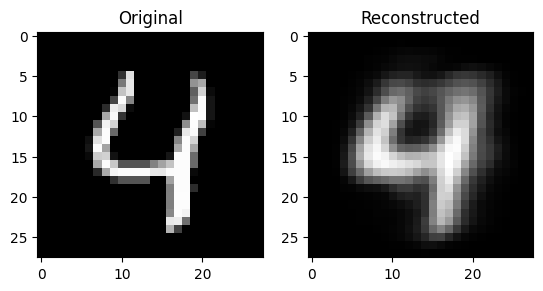

313/313 [==============================] - 1s 2ms/step
Mean Squared Error (MSE) over the entire test set: 0.037901234


In [104]:
mse.append(VAE(4))

EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9


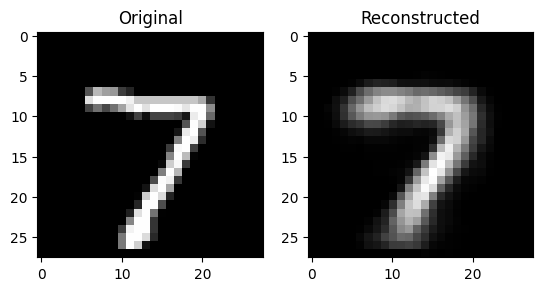

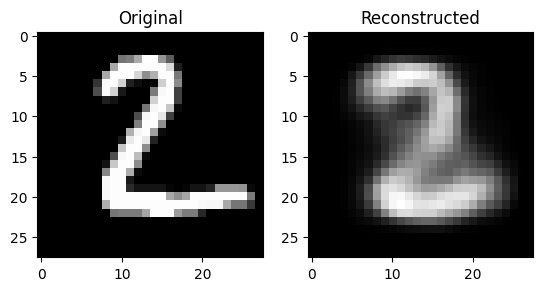

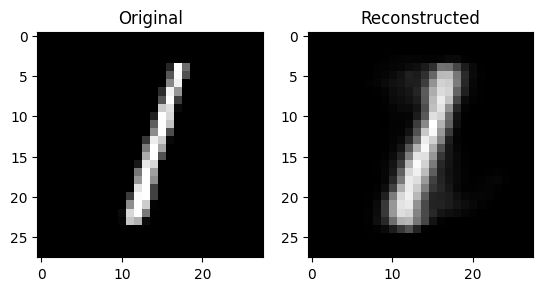

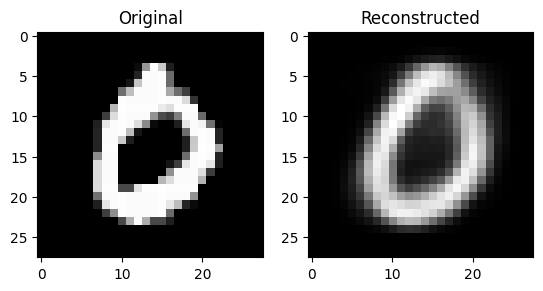

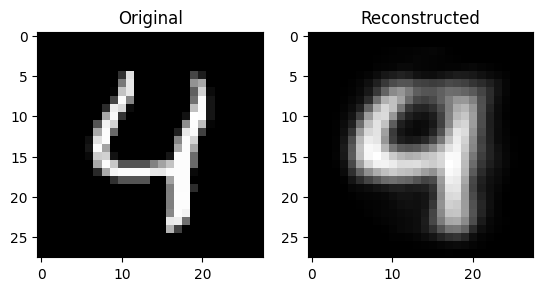

313/313 [==============================] - 1s 2ms/step
Mean Squared Error (MSE) over the entire test set: 0.0372155


In [105]:
mse.append(VAE(8))

EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9


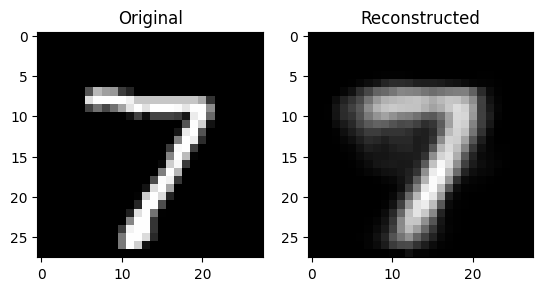

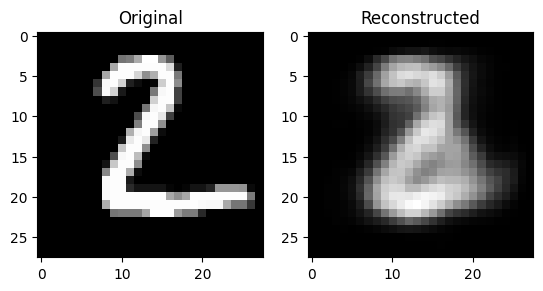

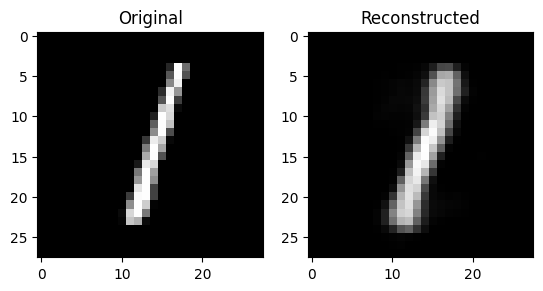

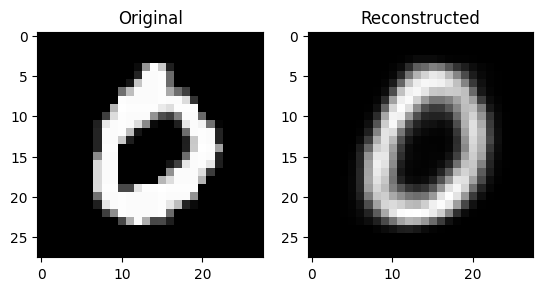

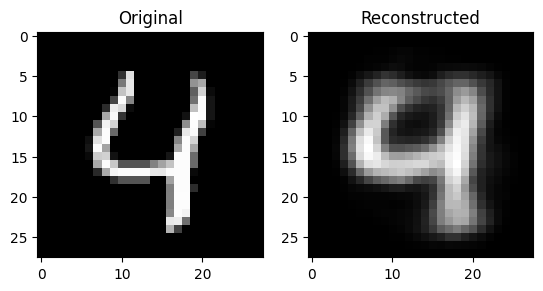

313/313 [==============================] - 1s 2ms/step
Mean Squared Error (MSE) over the entire test set: 0.03665639


In [106]:
mse.append(VAE(16))

EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9


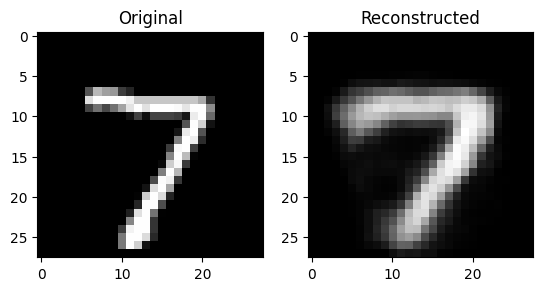

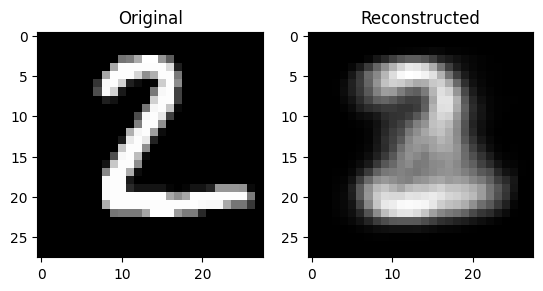

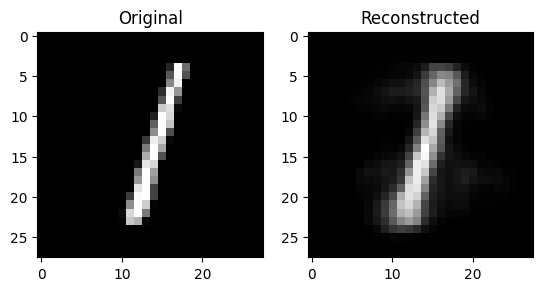

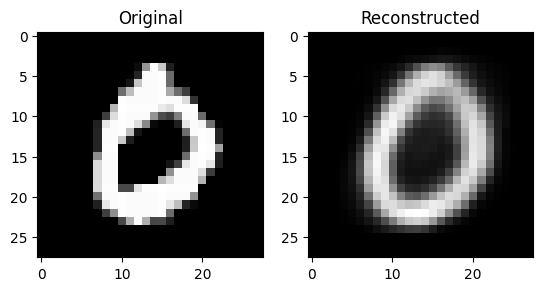

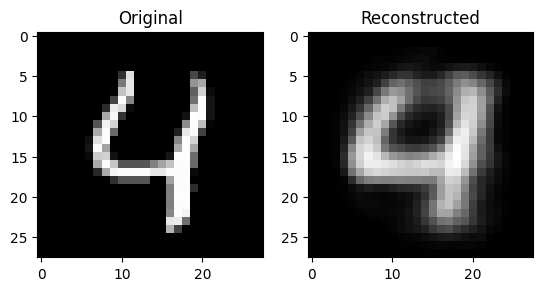

313/313 [==============================] - 1s 2ms/step
Mean Squared Error (MSE) over the entire test set: 0.03855335


In [107]:
mse.append(VAE(32))

EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9


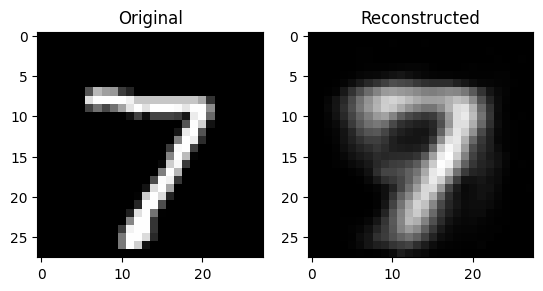

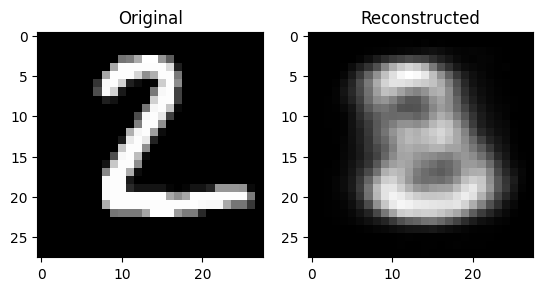

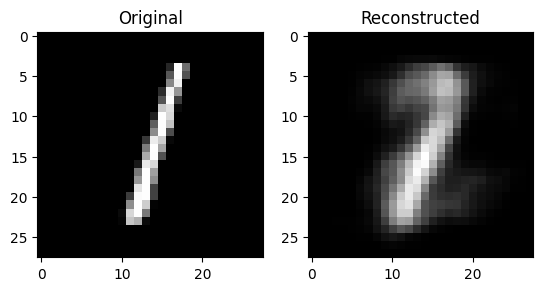

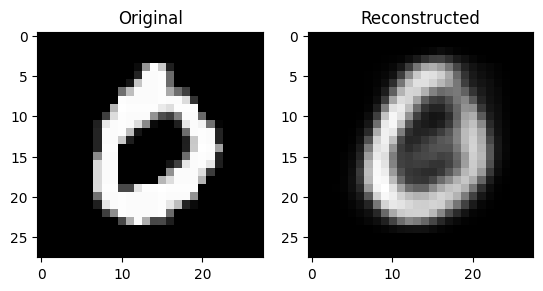

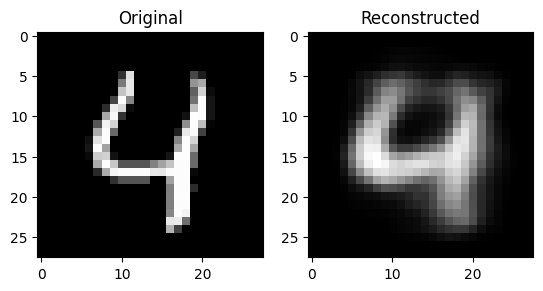

313/313 [==============================] - 1s 2ms/step
Mean Squared Error (MSE) over the entire test set: 0.041515283


In [108]:
mse.append(VAE(64))

In [109]:
mse_c=mse
print(mse_c)

[<tf.Tensor: shape=(), dtype=float32, numpy=0.0443215>, <tf.Tensor: shape=(), dtype=float32, numpy=0.037901234>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0372155>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03665639>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03855335>, <tf.Tensor: shape=(), dtype=float32, numpy=0.041515283>]


In [110]:
mse_a=[0.09035717682903309, 0.07757722474647646, 0.04388243913666021, 0.028337389688390897, 0.017158853934173903, 0.009156166135083247]
mse_b=[0.10996395373405772, 0.09620197656253555, 0.07647706886509247, 0.05442414066017629, 0.03538122107436013, 0.02017924272594421]

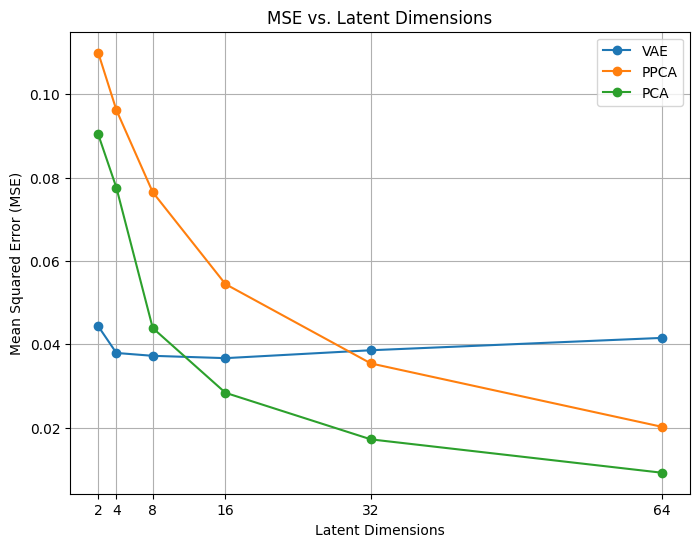

In [111]:
plt.figure(figsize=(8, 6))
plt.plot(ldims, mse_c, marker='o', label='VAE')
plt.plot(ldims, mse_b, marker='o', label='PPCA')
plt.plot(ldims, mse_a, marker='o', label='PCA')
plt.xticks(ldims, ldims)
plt.title('MSE vs. Latent Dimensions')
plt.xlabel('Latent Dimensions')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()  # Add a legend to differentiate between the MSE lists
plt.grid(True)
plt.show()
